# Issue Count

The issue count is the count of parking geohashes in the city that have the percentage of vehicles searching for parking equal to or above the  city average (based on the percentage of vehicles searching for parking from the Geotab data)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Shown below is Geotab Searching Parking dataset.

In [3]:
df = pd.read_csv("SearchingForParking_Toronto.csv")
df

,Geohash,Latitude_SW,Longitude_SW,Latitude_NE,Longitude_NE,Latitude,Longitude,City,County,State,...,HourlyDistribution,SearchingByHour,PercentCar,PercentMPV,PercentLDT,PercentMDT,PercentHDT,PercentOther,UpdateDate,Version
0,dpz2nth,43.62122,-79.51355,43.62259,-79.51218,43.62203,-79.51279,Toronto,NaN,Ontario,...,"{""00"": null, ""01"": 0, ""02"": null, ""03"": null, ...","{""00"": null, ""01"": 0, ""02"": null, ""03"": null, ...",0.0000,0.1563,0.4375,0.0938,0.2188,0.0938,2019-01-02,2.1
1,dpz2pnp,43.62671,-79.48746,43.62808,-79.48608,43.62777,-79.48653,Toronto,NaN,Ontario,...,"{""00"": 0, ""01"": 0, ""02"": 0, ""03"": 0, ""04"": 0, ...","{""00"": 0, ""01"": 0, ""02"": 0, ""03"": 0, ""04"": 0, ...",0.0000,0.0000,0.0172,0.0000,0.8621,0.1207,2019-01-02,2.1
2,dpz9k90,43.81897,-79.25537,43.82034,-79.25400,43.81917,-79.25500,Toronto,NaN,Ontario,...,"{""00"": 0, ""01"": 0, ""02"": null, ""03"": 0, ""04"": ...","{""00"": 0, ""01"": 0, ""02"": null, ""03"": 0, ""04"": ...",0.0000,0.0250,0.6000,0.0500,0.3250,0.0000,2019-01-02,2.1
3,dpz95wt,43.80524,-79.29245,43.80661,-79.29108,43.80573,-79.29157,Toronto,NaN,Ontario,...,"{""00"": 0.0478, ""01"": 0, ""02"": 0.0478, ""03"": 0....","{""00"": 0.3333, ""01"": 0, ""02"": 0.1667, ""03"": 0....",0.1186,0.2542,0.2712,0.0000,0.3559,0.0000,2019-01-02,2.1
4,dpz2jsn,43.61572,-79.55475,43.61710,-79.55338,43.61657,-79.55445,Toronto,NaN,Ontario,...,"{""00"": 0.0667, ""01"": null, ""02"": null, ""03"": 0...","{""00"": 0.4, ""01"": null, ""02"": null, ""03"": 0, ""...",0.0270,0.0811,0.5946,0.0270,0.1622,0.1081,2019-01-02,2.1
5,dpz2nmb,43.62534,-79.53003,43.62671,-79.52866,43.62637,-79.52971,Toronto,NaN,Ontario,...,"{""00"": null, ""01"": null, ""02"": null, ""03"": nul...","{""00"": null, ""01"": null, ""02"": null, ""03"": nul...",0.6180,0.3258,0.0449,0.0000,0.0000,0.0112,2019-01-02,2.1
6,dpz2nhk,43.61710,-79.53552,43.61847,-79.53415,43.61753,-79.53527,Toronto,NaN,Ontario,...,"{""00"": null, ""01"": null, ""02"": null, ""03"": nul...","{""00"": null, ""01"": null, ""02"": null, ""03"": nul...",0.0339,0.8644,0.0678,0.0000,0.0000,0.0339,2019-01-02,2.1
7,dpz2nj3,43.62259,-79.53964,43.62396,-79.53827,43.62325,-79.53888,Toronto,NaN,Ontario,...,"{""00"": 0, ""01"": 0.0545, ""02"": 0, ""03"": 0, ""04""...","{""00"": 0, ""01"": 0.037, ""02"": 0, ""03"": 0, ""04"":...",0.0000,0.0000,0.1429,0.0000,0.8571,0.0000,2019-01-02,2.1
8,dpz2nf9,43.60748,-79.50668,43.60886,-79.50531,43.60832,-79.50550,Toronto,NaN,Ontario,...,"{""00"": null, ""01"": null, ""02"": 0, ""03"": 0, ""04...","{""00"": null, ""01"": null, ""02"": 0, ""03"": 0, ""04...",0.0094,0.2170,0.5377,0.0660,0.1038,0.0660,2019-01-02,2.1
9,dpz9jyk,43.80386,-79.19495,43.80524,-79.19357,43.80430,-79.19430,Toronto,NaN,Ontario,...,"{""00"": 0, ""01"": 0, ""02"": 0.0587, ""03"": 0.0587,...","{""00"": 0, ""01"": 0, ""02"": 0.0286, ""03"": 0.0645,...",0.0000,0.8229,0.0517,0.0000,0.0627,0.0627,2019-01-02,2.1


In [4]:
df.drop(df.columns[[7,8,9,10,11,27,28]], axis=1, inplace=True)
df.head()

,Geohash,Latitude_SW,Longitude_SW,Latitude_NE,Longitude_NE,Latitude,Longitude,AvgTimeToPark,AvgTimeToParkRatio,TotalSearching,...,AvgTotalGeohashes,CirclingDistribution,HourlyDistribution,SearchingByHour,PercentCar,PercentMPV,PercentLDT,PercentMDT,PercentHDT,PercentOther
0,dpz2nth,43.62122,-79.51355,43.62259,-79.51218,43.62203,-79.51279,4.2656,1.4406,32,...,11.2500,"{""dpz2ntm"":0.1646, ""dpz2ntj"":0.0556, ""dpz2nt7""...","{""00"": null, ""01"": 0, ""02"": null, ""03"": null, ...","{""00"": null, ""01"": 0, ""02"": null, ""03"": null, ...",0.0000,0.1563,0.4375,0.0938,0.2188,0.0938
1,dpz2pnp,43.62671,-79.48746,43.62808,-79.48608,43.62777,-79.48653,6.5115,1.1102,58,...,9.5172,"{""dpz2pq0"":0.1145, ""dpz2pnp"":0.2925, ""dpz2pmb""...","{""00"": 0, ""01"": 0, ""02"": 0, ""03"": 0, ""04"": 0, ...","{""00"": 0, ""01"": 0, ""02"": 0, ""03"": 0, ""04"": 0, ...",0.0000,0.0000,0.0172,0.0000,0.8621,0.1207
2,dpz9k90,43.81897,-79.25537,43.82034,-79.25400,43.81917,-79.25500,4.4358,1.3241,40,...,7.2000,"{""dpz9k90"":0.3395, ""dpz9k8c"":0.0621, ""dpz9k3p""...","{""00"": 0, ""01"": 0, ""02"": null, ""03"": 0, ""04"": ...","{""00"": 0, ""01"": 0, ""02"": null, ""03"": 0, ""04"": ...",0.0000,0.0250,0.6000,0.0500,0.3250,0.0000
3,dpz95wt,43.80524,-79.29245,43.80661,-79.29108,43.80573,-79.29157,3.1831,1.0765,59,...,7.4407,"{""dpz95wv"":0.0873, ""dpz95ws"":0.0597, ""dpz95wq""...","{""00"": 0.0478, ""01"": 0, ""02"": 0.0478, ""03"": 0....","{""00"": 0.3333, ""01"": 0, ""02"": 0.1667, ""03"": 0....",0.1186,0.2542,0.2712,0.0000,0.3559,0.0000
4,dpz2jsn,43.61572,-79.55475,43.61710,-79.55338,43.61657,-79.55445,6.5225,1.6573,37,...,9.2973,"{""dpz2jez"":0.215, ""dpz2jsr"":0.0392, ""dpz2jsj"":...","{""00"": 0.0667, ""01"": null, ""02"": null, ""03"": 0...","{""00"": 0.4, ""01"": null, ""02"": null, ""03"": 0, ""...",0.0270,0.0811,0.5946,0.0270,0.1622,0.1081


Find the city average, only consider those geohashes have greater than 10 total searching.

In [5]:
AvgThreshold = df[df.TotalSearching > 10].PercentSearching.mean()
AvgThreshold

0.11617007779772566

Define a parking lot that has parking issue when the searching time is larger than average.

In [6]:
df_issue = df[df.PercentSearching > AvgThreshold]

In [7]:
data = df_issue[['Geohash','PercentSearching','Latitude','Longitude']]
data['Value'] = data.apply(lambda row:[row.Latitude,row.Longitude,(row.PercentSearching-AvgThreshold)/0.1],axis = 1)
heatdata = data.Value.tolist()

C:\Users\fff\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Divided geohashes into six districts using geocode to convert coordinate to address

In [5]:
from geopy.exc import GeocoderTimedOut

def re_geocode(coord):
    try:
        location = geolocator.reverse(coord,timeout = 10)
        return location.address.split(",")[-5]
    except GeocoderTimedOut:
        return re_geocode(coord)

In [6]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geotab")
district = []
for index, row in df.iterrows():
    lat = row["Latitude"]
    lon = row["Longitude"]
    coord = "{},{}".format(lat,lon)
    dis = re_geocode(coord)
    district.append(dis)

In [ ]:
df.to_csv("SearchingParkingDistrict.csv")

In [9]:
df['District'] = district
df['District'] = df['District'].str.strip()
df.head()

,Geohash,Latitude_SW,Longitude_SW,Latitude_NE,Longitude_NE,Latitude,Longitude,AvgTimeToPark,AvgTimeToParkRatio,TotalSearching,...,CirclingDistribution,HourlyDistribution,SearchingByHour,PercentCar,PercentMPV,PercentLDT,PercentMDT,PercentHDT,PercentOther,District
0,dpz2nth,43.62122,-79.51355,43.62259,-79.51218,43.62203,-79.51279,4.2656,1.4406,32,...,"{""dpz2ntm"":0.1646, ""dpz2ntj"":0.0556, ""dpz2nt7""...","{""00"": null, ""01"": 0, ""02"": null, ""03"": null, ...","{""00"": null, ""01"": 0, ""02"": null, ""03"": null, ...",0.0000,0.1563,0.4375,0.0938,0.2188,0.0938,Etobicoke
1,dpz2pnp,43.62671,-79.48746,43.62808,-79.48608,43.62777,-79.48653,6.5115,1.1102,58,...,"{""dpz2pq0"":0.1145, ""dpz2pnp"":0.2925, ""dpz2pmb""...","{""00"": 0, ""01"": 0, ""02"": 0, ""03"": 0, ""04"": 0, ...","{""00"": 0, ""01"": 0, ""02"": 0, ""03"": 0, ""04"": 0, ...",0.0000,0.0000,0.0172,0.0000,0.8621,0.1207,Etobicoke
2,dpz9k90,43.81897,-79.25537,43.82034,-79.25400,43.81917,-79.25500,4.4358,1.3241,40,...,"{""dpz9k90"":0.3395, ""dpz9k8c"":0.0621, ""dpz9k3p""...","{""00"": 0, ""01"": 0, ""02"": null, ""03"": 0, ""04"": ...","{""00"": 0, ""01"": 0, ""02"": null, ""03"": 0, ""04"": ...",0.0000,0.0250,0.6000,0.0500,0.3250,0.0000,Scarborough
3,dpz95wt,43.80524,-79.29245,43.80661,-79.29108,43.80573,-79.29157,3.1831,1.0765,59,...,"{""dpz95wv"":0.0873, ""dpz95ws"":0.0597, ""dpz95wq""...","{""00"": 0.0478, ""01"": 0, ""02"": 0.0478, ""03"": 0....","{""00"": 0.3333, ""01"": 0, ""02"": 0.1667, ""03"": 0....",0.1186,0.2542,0.2712,0.0000,0.3559,0.0000,Scarborough
4,dpz2jsn,43.61572,-79.55475,43.61710,-79.55338,43.61657,-79.55445,6.5225,1.6573,37,...,"{""dpz2jez"":0.215, ""dpz2jsr"":0.0392, ""dpz2jsj"":...","{""00"": 0.0667, ""01"": null, ""02"": null, ""03"": 0...","{""00"": 0.4, ""01"": null, ""02"": null, ""03"": 0, ""...",0.0270,0.0811,0.5946,0.0270,0.1622,0.1081,Etobicoke


Count the number of geohashes in each district

In [10]:
df.groupby('District')['Geohash'].count()

District
East York       113
Etobicoke       609
North York      776
Old Toronto    1469
Scarborough     593
York            171
Name: Geohash, dtype: int64

Count parking issues in each district.

In [11]:
df_dis = df.groupby('District')['PercentSearching'].apply(lambda x: (x > AvgThreshold).sum()).reset_index(name='IssueCount')
df_dis

,District,IssueCount
0,East York,44
1,Etobicoke,217
2,North York,287
3,Old Toronto,425
4,Scarborough,249
5,York,77


The bar plot shows 6 districts ranked by the issue count

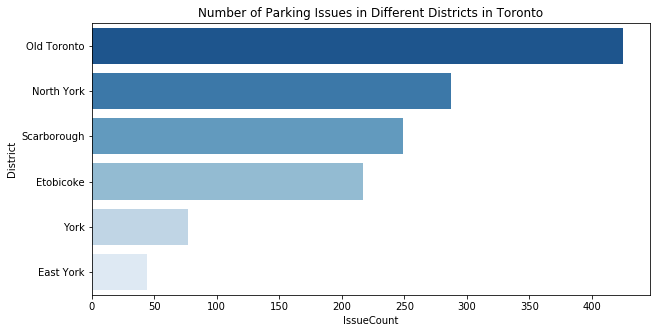

In [63]:
df_dis = df_dis.sort_values('IssueCount',ascending = False)
plt.figure(figsize=(10,5))
sns.barplot(x = df_dis.IssueCount,y = df_dis.District,data = df_dis, palette="Blues_r")
plt.title('Number of Parking Issues in Different Districts in Toronto')
plt.xlabel('IssueCount')
plt.ylabel('District')
plt.show()

Read district area shape from open data from city of toronto

In [57]:
import pysal as ps
import geojson as gj
from pysal.contrib.viz import folium_mapping as fm

In [59]:
shp = ps.open('cityprj_former_municipality.shp')
dbf = ps.open('cityprj_former_municipality.dbf')
city = fm.build_features(shp, dbf)

In [61]:
with open('city.json', 'w') as out:
    gj.dump(city, out)

In [12]:
df_dis['AREA_NAME'] = df_dis['District'].str.upper()
df_dis['AREA_NAME'][3] = "TORONTO"
df_dis

C:\Users\fff\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,District,IssueCount,AREA_NAME
0,East York,44,EAST YORK
1,Etobicoke,217,ETOBICOKE
2,North York,287,NORTH YORK
3,Old Toronto,425,TORONTO
4,Scarborough,249,SCARBOROUGH
5,York,77,YORK


Create a choropleth map to show the issue count in each district

In [98]:
import folium
import geopandas as gpd
from folium.plugins import HeatMap
m = folium.Map([43.6798, -79.4252], zoom_start = 12, tiles='openstreetmap')
folium.LatLngPopup().add_to(m)

In [99]:
folium.Choropleth(
 geo_data = gdf,
 data = df_dis,
 columns=['AREA_NAME', 'IssueCount'],
 key_on='feature.properties.AREA_NAME',
 fill_color='YlGn',
 fill_opacity=0.5,
 line_opacity=0.7,
 legend_name='Parking Issue Count in Toronto'
).add_to(m)


In [100]:
from folium.features import DivIcon
folium.map.Marker(
    [43.6499, -79.4288],
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-family: Comic Sans MS; font-size: 18pt">Old Toronto</div>',
        )
    ).add_to(m)
folium.map.Marker(
    [43.6683, -79.5900],
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-family: Comic Sans MS; font-size: 18pt">Etobicoke</div>',
        )
    ).add_to(m)
folium.map.Marker(
    [43.7516, -79.4864],
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-family: Comic Sans MS; font-size: 18pt">North York</div>',
        )
    ).add_to(m)
folium.map.Marker(
    [43.7938, -79.2812],
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-family: Comic Sans MS; font-size: 18pt">Scarborough</div>',
        )
    ).add_to(m)
folium.map.Marker(
    [43.6916, -79.4960],
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-family: Comic Sans MS; font-size: 18pt">York</div>',
        )
    ).add_to(m)
folium.map.Marker(
    [43.7055, -79.3643],
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-family: Comic Sans MS; font-size: 18pt">East York</div>',
        )
    ).add_to(m)

The dark green means more parking issues. Old Toronto Area has bigger challenge in searching parking.

In [101]:
m.save('city_data.html')
# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=city_data.html width=780 height=550></iframe>')

The heatmap shows the difference between percent driving and average threshold

In [103]:
HeatMap(data = heatdata, min_opacity = 0.3, max_zoom = 12, max_val = 3,radius = 17).add_to(m)
m.save('plot_data.html')
# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=plot_data.html width=780 height=550></iframe>')

# Average parking time 

The catplot gragh shows the average parking time comparing between each district. The average time in Old Toronto Area is around 6 mins.

<Figure size 720x360 with 0 Axes>

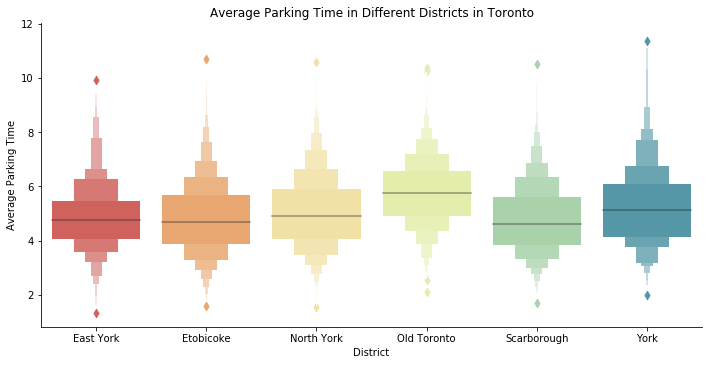

In [115]:
plt.figure(figsize=(10,5))
sns.catplot(x="District", y="AvgTimeToPark", kind="boxen",data=df.sort_values("District"),palette="Spectral",height=5,aspect=2)
plt.title('Average Parking Time in Different Districts in Toronto')
plt.xlabel('District')
plt.ylabel('Average Parking Time')
plt.show()

# Vehicle Type

To check the vehicle type distribution in each district.

In [125]:
car = df[['Geohash','PercentCar','PercentMPV','PercentLDT','PercentMDT','PercentHDT','PercentOther','District']].groupby('District').mean()

Multi-purpose Vehicles and Light Duty Vehicles have large proportion in finding parking space. While, the car has less challenge in parking.

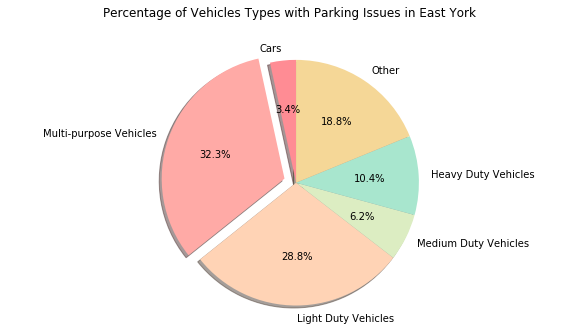

In [164]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
# The slices will be ordered and plotted counter-clockwise.
labels = 'Cars', 'Multi-purpose Vehicles', 'Light Duty Vehicles', 'Medium Duty Vehicles','Heavy Duty Vehicles','Other'
sizes = car.iloc[0]
colors = ['#FF8C94', '#FFAAA6', '#FFD3B5', '#DCEDC2','#A8E6CE','#F5D797']
explode = (0, 0.1, 0, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Percentage of Vehicles Types with Parking Issues in East York',pad = 30)
plt.show()

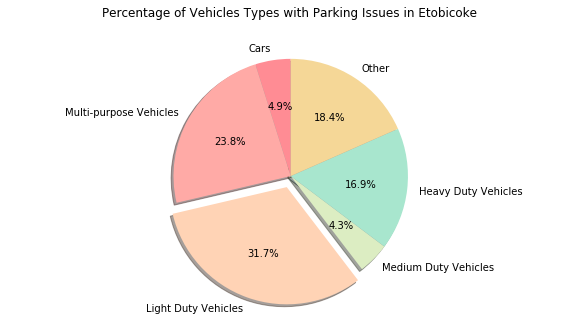

In [163]:
plt.figure(figsize=(10,5))
# The slices will be ordered and plotted counter-clockwise.
labels = 'Cars', 'Multi-purpose Vehicles', 'Light Duty Vehicles', 'Medium Duty Vehicles','Heavy Duty Vehicles','Other'
sizes = car.iloc[1]
colors = ['#FF8C94', '#FFAAA6', '#FFD3B5', '#DCEDC2','#A8E6CE','#F5D797']
explode = (0, 0, 0.1, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Percentage of Vehicles Types with Parking Issues in Etobicoke',pad = 30)
plt.show()

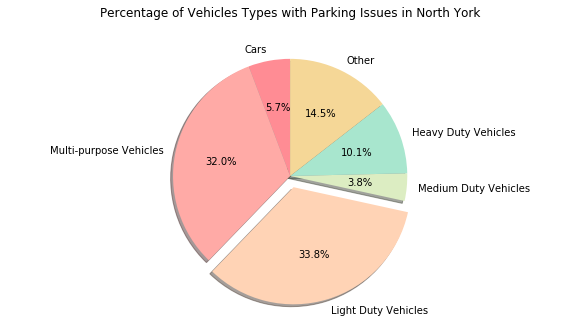

In [167]:
plt.figure(figsize=(10,5))
# The slices will be ordered and plotted counter-clockwise.
labels = 'Cars', 'Multi-purpose Vehicles', 'Light Duty Vehicles', 'Medium Duty Vehicles','Heavy Duty Vehicles','Other'
sizes = car.iloc[2]
colors = ['#FF8C94', '#FFAAA6', '#FFD3B5', '#DCEDC2','#A8E6CE','#F5D797']
explode = (0, 0, 0.1, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Percentage of Vehicles Types with Parking Issues in North York',pad = 30)
plt.show()

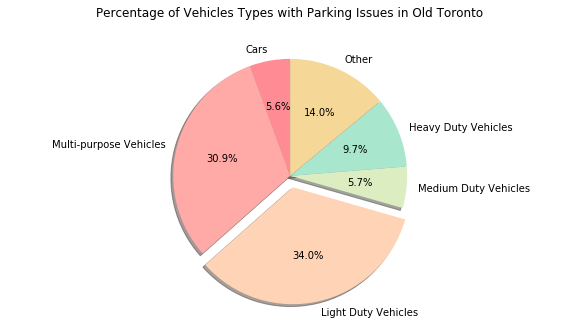

In [169]:
plt.figure(figsize=(10,5))
# The slices will be ordered and plotted counter-clockwise.
labels = 'Cars', 'Multi-purpose Vehicles', 'Light Duty Vehicles', 'Medium Duty Vehicles','Heavy Duty Vehicles','Other'
sizes = car.iloc[3]
colors = ['#FF8C94', '#FFAAA6', '#FFD3B5', '#DCEDC2','#A8E6CE','#F5D797']
explode = (0, 0, 0.1, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Percentage of Vehicles Types with Parking Issues in Old Toronto',pad = 30)
plt.show()

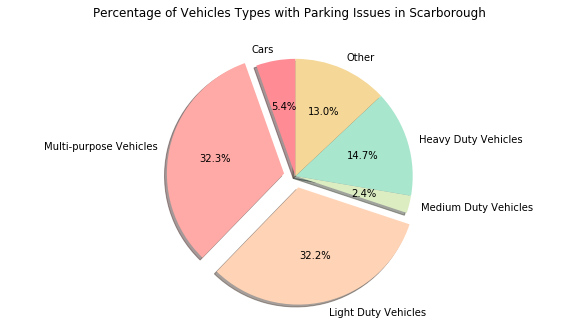

In [171]:
plt.figure(figsize=(10,5))
# The slices will be ordered and plotted counter-clockwise.
labels = 'Cars', 'Multi-purpose Vehicles', 'Light Duty Vehicles', 'Medium Duty Vehicles','Heavy Duty Vehicles','Other'
sizes = car.iloc[4]
colors = ['#FF8C94', '#FFAAA6', '#FFD3B5', '#DCEDC2','#A8E6CE','#F5D797']
explode = (0, 0.1, 0.1, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Percentage of Vehicles Types with Parking Issues in Scarborough',pad = 30)
plt.show()

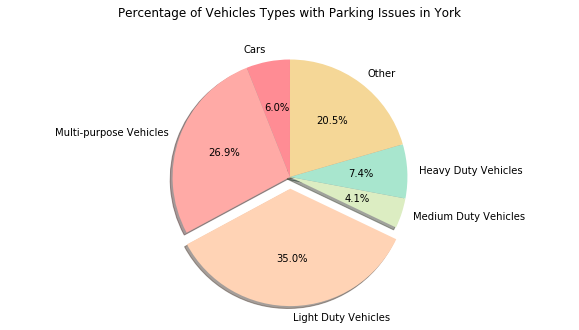

In [173]:
plt.figure(figsize=(10,5))
# The slices will be ordered and plotted counter-clockwise.
labels = 'Cars', 'Multi-purpose Vehicles', 'Light Duty Vehicles', 'Medium Duty Vehicles','Heavy Duty Vehicles','Other'
sizes = car.iloc[5]
colors = ['#FF8C94', '#FFAAA6', '#FFD3B5', '#DCEDC2','#A8E6CE','#F5D797']
explode = (0, 0, 0.1, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Percentage of Vehicles Types with Parking Issues in York',pad = 30)
plt.show()